<a href="https://colab.research.google.com/github/ggandara13/innocent_death/blob/main/ProjectPython_InnocentDeath_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://qs.topuniversities.com/hs-fs/hubfs/07_HumanScience_H_300.jpg?width=4961&height=3508&name=07_HumanScience_H_300.jpg\" width="150" height="100"  />





<img src="https://drive.google.com/uc?id=1qj4h611G_C32zLV8LO0HcI5PJrBgdhy9" width="450" height="300"  />

#Fatal Encounters: explained!

**Team A**
   
*   Diana Quimi
*   Tanya Coghlan
*   Miguel Suárez
*   Alejandro Silva
*   Gerardo Gandara



  
  
  
  

For the final report, we have chosen this database created by Fatal Encounters. The database contains events in which an individual was killed during an encounter with law enforcement. Most of the events are a direct result of the use of force by the police, however, some other events are included in which the police indirectly cause death, for example, through a chase resulting in an accident which causes the death of the subject.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import scipy.stats as ss
sns.set()

Two dataset sources, the first one is the main dataset and has all the fatal deaths for USA. The second dataset contains the variables that will become the explanatory variables that will be use to predict the deaths

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/ggandara13/innocent_death/6a4499d9a07ba6901017dc52ca70c805315fac9b/Innocent%20Deaths%20caused%20by%20Police.csv")
data_USA=pd.read_csv("https://raw.githubusercontent.com/ggandara13/innocent_death/main/Population_USA_2020.csv")
data_original = data


We are going to use the following library to get the EDA (Explanatory Data Analysis)

#Pandas Profiling
Generates profile reports from a pandas DataFrame.

The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.


For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

*   Type inference: detect the types of columns in a dataframe.
Essentials: type, unique values, missing values
*   Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
*   Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
*   Most frequent values
*   Histogram
*   Correlations highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
*   Missing values matrix, count, heatmap and dendrogram of missing values
*   Text analysis learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.
*   File and Image analysis extract file sizes, creation dates and dimensions and scan for truncated images or those containing EXIF information.

In order to run this library Pandas Profiling, you need to install it every time you run the colab book. Then restart the runtime and run again 'comment #' it to avoid re-installing the second time

In [ ]:
#import pip
#!pip install -U pandas_profiling


In [ ]:
df_EDA=ProfileReport(data)
df_EDA

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data.head(2)

Unique ID  ... Foreknowledge of mental illness
0      25747  ...                              No
1      25748  ...                              No

[2 rows x 27 columns]

# ANOVA and Linear Regression use case

Analysis of Variance or ANOVA for short is a statistical method used to analyze the variances of a population in order to test the hypothesis about their means. In this case we will focus on California to analyze if the number of deaths in that state is bias in terms of race. We selected 3 main groups of race in that state

*   Asian/Pacific Islander
*   European-American/White
*   Hispanic/Latino







In [ ]:
grouped_df = data.groupby(['State', 'Location of death (city)', 'Race']).size().reset_index(name='count') 
grouped_df.head(2)

State Location of death (city)                     Race  count
0    AK                   Ambler         Race unspecified      1
1    AK             Anchor Point  European-American/White      1

In [ ]:
grouped_CA = grouped_df[ ( grouped_df.State =='CA') & (
    (grouped_df['Race']=='Asian/Pacific Islander' ) |
    (grouped_df['Race']=='European-American/White' ) | (grouped_df['Race']=='Hispanic/Latino' )    
    )].dropna()
grouped_CA.head(3)

State Location of death (city)                     Race  count
792    CA                   Acampo          Hispanic/Latino      2
794    CA                 Adelanto  European-American/White      1
795    CA                 Adelanto          Hispanic/Latino      1

## How do we apply Linear Regression in this case? In a linear regression analysis, our objective is finding a linear relationship between the independent and one or more dependent variables

We are going to use ANOVA and Linear Regression, focusing in 2 variables : The RACE and the amount of deaths.


> Our aim is to determine whether there is a significant difference in the average **deaths**(count) between the three main **RACES** of our dataset: Asian, White and Hispanic.



Using the pandas group by functionality, we can quickly see the group means.

In [ ]:
grouped_CA[['Race','count']].groupby('Race').mean()

count
Race                             
Asian/Pacific Islander   1.967033
European-American/White  2.581560
Hispanic/Latino          4.086022

This values will be used to compared the results on the Lineal Regression output values

# Let's do it first with Anova 

Let’s start running an ANOVA. Using Python’s scipy package


> **Null Hypothesis** is whether there is a difference in the average DEATH  between each of the races.


First, separate the three samples (one for each race) into a variable each.

In [ ]:
AS = grouped_CA[grouped_CA.Race=='Asian/Pacific Islander']['count']
WH = grouped_CA[grouped_CA.Race=='European-American/White']['count']
HIS = grouped_CA[grouped_CA.Race=='Hispanic/Latino']['count']

Now, run a one-way ANOVA

In [ ]:
import scipy.stats as ss
f_statistic, p_value = ss.f_oneway(AS, WH, HIS)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


F_Statistic: 5.12590619481515, P-Value: 0.006118868338167455


Scipy’s f_oneway function returns the F-Statistic and the corresponding P-Value. In this case, our P-Value (0.006) is below our 5% threshold, therefore, we reject the null hypothesis that the three groups (asian, white and hispanic ) have the same death rate mean.

Let’s now run a Linear Regression and compare the results and discover what race is the one that is different. If we were bias...we would say the white group. Let's see

## We will run an Ordinary Least Squares Regression where our independent variable is DEATHs (count)  and the dependent variable is race. 

In [ ]:
from statsmodels.formula.api import ols
model_name = ols('count ~ C(Race)', data=grouped_CA).fit()
model_name.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.126
Date:                Wed, 20 Oct 2021   Prob (F-statistic):            0.00612
Time:                        07:52:52   Log-Likelihood:                -3051.0
No. Observations:                 886   AIC:                             6108.
Df Residuals:                     883   BIC:                             6122.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              1.9670      0.795      2.474      0.014       0.406       3.528
C(Race)[T.European-American/White]     0.6145      0.877      0.701      0.483      -1.106       2.335
C(Race)[T.Hispanic/Latino]             2.1190      0.887      2.388      0.017       0.378       3.860
==============================================================================
Omnibus:                     1779.783   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3766174.348
Skew:                          15.058   Prob(JB):                         0.00
Kurtosis:                     320.980   Cond. No.                         6.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observations : Comparing ANOVA and Linear Regression



*   First to notice is that we get the same F_Statistic result between the ANOVA and Linear Regression of 5.126. The P_Value between both analyses is also the same leading to the same conclusion that the means are not all equal.

*   Take a look at the coefficients provided by the linear regression model and compare them to the group’s means. The intercept of 1.9670 is exactly the Asian death mean. Adding the intercept plus the White Group coefficient of 0.6145 yields the White's group average. The same applies to the Hispanic's coefficients.


*   P-Value of White and Hispanic are different. White has a P-Value of 0.483, while the Hispanice coefficient has a lower value of 0.01 If you remember, the null hypothesis of linear regression is that the coefficients are equal to zero.

*   The coefficient for Hispanic has a P-Value below the threshold of 0.05, therefore we reject the null hypothesis that its coefficient is equal to zero. White Group, on the other hand, has a P-Value greater than our coefficient and thus we accept the null hypothesis that its coefficient’s value is equal to zero. The same applies to our intercept (Asian).


## This implies that Asian and White have equal means (statistically speaking) while Hispanic's  mean is the different one among the three. Looking at its average, we can see its significantly higher than the others.


#Conclusion

Latinos are disproportionately killed by police.
Latino community has often been left out of the debate about policing and reform. The historical legacy of police brutality against Black people is well-known and documented, dating back to the slave patrols. Many Americans view immigration as the primary concern of Latinos. The lack of a standardized system for reporting police killings means that Latino victims are often categorized as Black or White. In addition, Latinos as a group include a variety of cultures with different lived experiences.



*   In California, state data shows that Hispanics were 44 percent more likely to be perceived as armed by police — the greatest gap between perceived and confirmed cases of armed residents across racial and ethnic groups.

*   The perception that a suspect is armed is more likely to draw a show of force from police. California, the nation’s most populous state, is about 40 percent Latino.

#This exercise supports statistically the  previous  statament


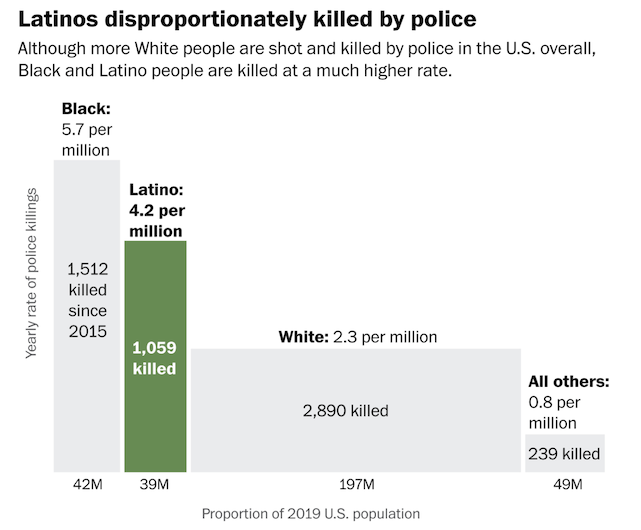


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

#Linear regression analysis to predict of number of deaths for the next year

 Building simple univariate linear regression model

 Libraries to use :

In [ ]:
import numpy
import pandas
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use("bmh")
%config InlineBackend.figure_formats=["svg"]

#import warnings
#warnings.simplefilter(action="ignore", category=FutureWarning)

Firstly, we need to create a sub-dataset with the data that we will use to predict the deaths. Firstly, we will use all the explanatory variables and then we will evaluate which of the multi variables are the significant ones.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30860 entries, 0 to 30859
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Unique ID                                               30860 non-null  int64  
 1   Name                                                    30860 non-null  object 
 2   Age                                                     29688 non-null  object 
 3   Gender                                                  30724 non-null  object 
 4   Race                                                    30860 non-null  object 
 5   URL of image                                            14355 non-null  object 
 6    Date of injury resulting in death (month/day/year)     30860 non-null  object 
 7   Location of injury (address)                            30306 non-null  object 
 8   Location of death (city)            

The column name is too long so we can rename easily the column for a shorter version

In [ ]:
data = data.rename(columns={' Date of injury resulting in death (month/day/year)':'Date_injury', 'Highest level of force': 'level_force'})
data['Date_injury']= pd.to_datetime(data['Date_injury'])
data.head(1)

Unique ID  ... Foreknowledge of mental illness
0      25747  ...                              No

[1 rows x 27 columns]

We are going to group all the datasets to select specific columsn only

In [ ]:
grouped_df = data.groupby(['Date_injury', 'Gender','State', 'Race', 'Foreknowledge of mental illness']).size().reset_index(name='Muertes')
grouped_df.head(2)

Date_injury Gender  ... Foreknowledge of mental illness Muertes
0  2000-01-01   Male  ...                              No       1
1  2000-01-01   Male  ...                              No       2

[2 rows x 6 columns]

We filter California, Hispanic and non-mental illness to do this exercise, in order we can identify Race and Mental illness as predictory variables

In [ ]:
df_CA = grouped_df[
                   ( grouped_df.State =='CA')  & 
                   (grouped_df['Race']=='Hispanic/Latino' )     &
                   (grouped_df['Foreknowledge of mental illness']=='No' )    
    ].dropna()

In [ ]:
df_CA.head(2)

Date_injury Gender  ... Foreknowledge of mental illness Muertes
79  2000-02-02   Male  ...                              No       1
97  2000-02-07   Male  ...                              No       1

[2 rows x 6 columns]

Now we can proceed to group the data by week to predict that number across the years

In [ ]:
df_CA['Date_injury'] = pd.to_datetime(df_CA['Date_injury']) - pd.to_timedelta(7, unit='d')
df_CA = df_CA.groupby(['Race', pd.Grouper(key='Date_injury', freq='W-MON')])['Muertes'].sum().reset_index().sort_values('Date_injury')
df_CA

Race Date_injury  Muertes
0    Hispanic/Latino  2000-01-31        2
1    Hispanic/Latino  2000-02-07        1
2    Hispanic/Latino  2000-03-13        4
3    Hispanic/Latino  2000-03-27        1
4    Hispanic/Latino  2000-04-24        1
..               ...         ...      ...
461  Hispanic/Latino  2021-07-26        1
462  Hispanic/Latino  2021-08-02        1
463  Hispanic/Latino  2021-08-09        1
464  Hispanic/Latino  2021-08-16        2
465  Hispanic/Latino  2021-08-23        1

[466 rows x 3 columns]

In [ ]:
df_CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 0 to 465
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Race         466 non-null    object        
 1   Date_injury  466 non-null    datetime64[ns]
 2   Muertes      466 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 14.6+ KB


In [ ]:
# Chart drawing
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=df_CA.Date_injury, y=df_CA.Muertes, name='Fallecidos'), row=1, col=1)


There is no linear relationship between TIME and Deaths.
The most basic machine learning algorithm that can be implemented on this data is linear regression. We can use the date column to extract features like — day, month, year, mon/fri etc. and then fit a linear regression model.

We will first sort the dataset in ascending order and then create a separate dataset so that any new feature created does not affect the original data 

In [ ]:
#sorting
data = df_CA.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df_CA)),columns=['Date_injury', 'Muertes'])

for i in range(0,len(data)):
    new_data['Date_injury'][i] = data['Date_injury'][i]
    new_data['Muertes'][i] = data['Muertes'][i]

#create features
from fastai.tabular import add_datepart
# from fastai.structured import  add_datepart
add_datepart(new_data, 'Date_injury')
new_data.drop('Date_injuryElapsed', axis=1, inplace=True)  #elapsed will be the time stamp
new_data.head(2)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



Muertes  Date_injuryYear  ...  Date_injuryIs_year_end  Date_injuryIs_year_start
0       2             2000  ...                   False                     False
1       1             2000  ...                   False                     False

[2 rows x 13 columns]

In [ ]:
pct_size = round(len(new_data.index)*0.8) # train dataset is 80% Validation Datset 20%
pct_size

373

In [ ]:
new_data.size

6058

In [ ]:
#split into train and validation
train = new_data[:pct_size]
valid = new_data[pct_size:]

x_train = train.drop('Muertes', axis=1)
y_train = train['Muertes']
x_valid = valid.drop('Muertes', axis=1)
y_valid = valid['Muertes']


In [ ]:
x_valid

Date_injuryYear  ...  Date_injuryIs_year_start
373             2018  ...                     False
374             2018  ...                     False
375             2018  ...                     False
376             2018  ...                     False
377             2018  ...                     False
..               ...  ...                       ...
461             2021  ...                     False
462             2021  ...                     False
463             2021  ...                     False
464             2021  ...                     False
465             2021  ...                     False

[93 rows x 12 columns]

In [ ]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print(rms)

0.8916803581826888


One disadvantage in using regression algorithms is that the model overfits to the date and month column. Instead of taking into account the previous values from the point of prediction, the model will consider the value from the same date a month ago, or the same date/month a year ago.

In [ ]:
preds

array([1.853626, 1.826068, 1.825602, 1.81864 , ..., 1.949038, 1.948572, 1.948106, 1.94764 ])

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

Let's apply Multi variable linear regression using the USA demographics data by State

First, let's create a dataset with all the states and predict 2020 deaths vs 2021.

In [ ]:
grouped_df.head(3)

Date_injury Gender  ... Foreknowledge of mental illness Muertes
0  2000-01-01   Male  ...                              No       1
1  2000-01-01   Male  ...                              No       2
2  2000-01-01   Male  ...                              No       1

[3 rows x 6 columns]

We are going to create a subset grouping all the rows by year

In [ ]:
import datetime as dt
grouped_df['Date_injury'] = pd.to_datetime(grouped_df['Date_injury'])
df_summary = grouped_df[grouped_df['Date_injury'].dt.year == 2018]
grouped_2018 = df_summary.groupby(['State', 'Gender', 'Race', 'Foreknowledge of mental illness']).size().reset_index(name='Muertes_2018') 

grouped_df['Date_injury'] = pd.to_datetime(grouped_df['Date_injury'])
df_summary = grouped_df[grouped_df['Date_injury'].dt.year == 2019]
grouped_2019 = df_summary.groupby(['State']).size().reset_index(name='Muertes_2019') 

df_summary = grouped_df[grouped_df['Date_injury'].dt.year == 2020]
grouped_2020 = df_summary.groupby(['State']).size().reset_index(name='Muertes_2020') 


In [ ]:
grouped_2018

State  Gender  ... Foreknowledge of mental illness Muertes_2018
0      AK    Male  ...                              No            1
1      AK    Male  ...                              No            2
2      AK    Male  ...                              No            4
3      AK    Male  ...                              No            1
4      AL  Female  ...                              No            2
..    ...     ...  ...                             ...          ...
450    WY    Male  ...                              No            2
451    WY    Male  ...                         Unknown            1
452    WY    Male  ...                              No            1
453    WY    Male  ...                              No            1
454    WY    Male  ...                         Unknown            1

[455 rows x 5 columns]

Now we have to merge all the dataframes to have the main dataser to predict with multiple depenndient variables, using DEATHs as variable to be predicted for one state as example : California

In [ ]:
inner_merged_total = pd.merge(grouped_2018, grouped_2019, on=["State"])
inner_merged_total.head()
inner_merged_total.shape
inner_merged_total

State  Gender  ... Muertes_2018 Muertes_2019
0      AK    Male  ...            1            8
1      AK    Male  ...            2            8
2      AK    Male  ...            4            8
3      AK    Male  ...            1            8
4      AL  Female  ...            2           35
..    ...     ...  ...          ...          ...
449    WY    Male  ...            2            3
450    WY    Male  ...            1            3
451    WY    Male  ...            1            3
452    WY    Male  ...            1            3
453    WY    Male  ...            1            3

[454 rows x 6 columns]

# with 2020

In [ ]:
inner_merged_total = pd.merge(inner_merged_total, grouped_2020, on=["State"])
inner_merged_total.head()
inner_merged_total.shape

(454, 7)

We merge now the dataframe with additional columns/explanatory variables to improve the predictions, since those variables can explain the results of the deahts

In [ ]:
df_data = pd.merge(inner_merged_total, data_USA, on=["State"])
df_data.head()
df_data.shape

(453, 14)

We drop the State and State name, before we create the dummy columns (numeric) vs categoricals

In [ ]:
df_data = df_data.drop('State', 1)
df_data = df_data.drop('STATE NAME', 1)

In [ ]:
df_data

Gender                     Race  ... UrbanPop  Rape
0      Male   African-American/Black  ...       48  44.5
1      Male  European-American/White  ...       48  44.5
2      Male  Native American/Alaskan  ...       48  44.5
3      Male         Race unspecified  ...       48  44.5
4    Female  European-American/White  ...       58  21.2
..      ...                      ...  ...      ...   ...
448    Male  European-American/White  ...       60  15.6
449    Male  European-American/White  ...       60  15.6
450    Male          Hispanic/Latino  ...       60  15.6
451    Male         Race unspecified  ...       60  15.6
452    Male         Race unspecified  ...       60  15.6

[453 rows x 12 columns]

Now, we replace the categorical columns into dummy variables for the model to read as numeric fields

In [ ]:
X = pd.get_dummies(data=df_data, drop_first=True)
X.head()
df_data = X

#Correlation

In [ ]:
df_data.corr()

Muertes_2018  ...  Foreknowledge of mental illness_Yes
Muertes_2018                                 1.000000  ...                            -0.164255
Muertes_2019                                 0.296441  ...                             0.098333
Muertes_2020_x                               0.296124  ...                             0.093311
Muertes_2020_y                               0.296124  ...                             0.093311
POPULATION                                   0.281538  ...                             0.086449
GDP                                          0.265903  ...                             0.082080
Murder                                       0.154180  ...                             0.045129
Assault                                      0.150442  ...                             0.011719
UrbanPop                                     0.162960  ...                             0.029076
Rape                                         0.165882  ...                             0.025454
Gender_Male                                  0.184811  ...                             0.149854
Gender_Transgender                          -0.033990  ...                            -0.031540
Race_Asian/Pacific Islander                 -0.073932  ...                             0.020507
Race_European-American/White                 0.067563  ...                             0.041741
Race_Hispanic/Latino                         0.033961  ...                            -0.113177
Race_Middle Eastern                         -0.024008  ...                            -0.022278
Race_Native American/Alaskan                -0.081905  ...                            -0.067132
Race_Race unspecified                       -0.062625  ...                             0.104960
Foreknowledge of mental illness_No           0.330948  ...                            -0.554718
Foreknowledge of mental illness_Unknown     -0.167749  ...                            -0.195594
Foreknowledge of mental illness_Yes         -0.164255  ...                             1.000000

[21 rows x 21 columns]

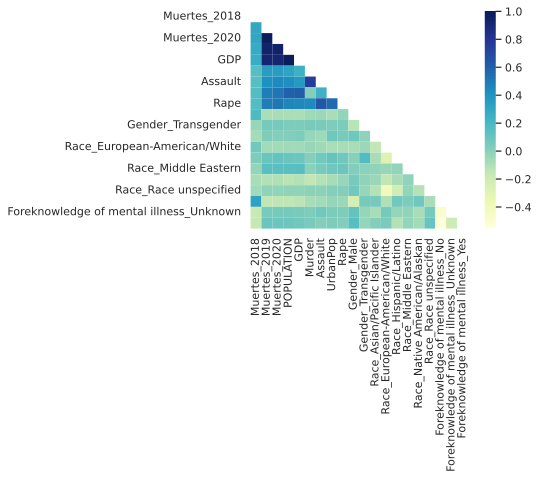

In [ ]:
corr = df_data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True,  cmap="YlGnBu")
    plt.show()

Separate the dataset in training and testing

In [ ]:
# Dividing the training data set into X and Y
y_train = df_data.pop('Muertes_2020')
#y_train

In [ ]:
X_train = df_data

In [ ]:
y_train = np.array(y_train)
y_train
X_train_lm = np.array(X_train)

In [ ]:
import statsmodels.api as sm

lm_fit = sm.OLS(y_train, X_train).fit()
print(lm_fit.params)

Muertes_2018                               0.034755
Muertes_2019                               0.937741
POPULATION                                 0.000003
GDP                                       -0.000029
Murder                                    -0.738592
Assault                                    0.014317
UrbanPop                                  -0.070457
Rape                                       0.396939
Gender_Male                               -0.199388
Gender_Transgender                         5.455723
Race_Asian/Pacific Islander               -4.186832
Race_European-American/White              -1.286448
Race_Hispanic/Latino                      -0.178956
Race_Middle Eastern                        3.050515
Race_Native American/Alaskan               1.800764
Race_Race unspecified                     -1.960953
Foreknowledge of mental illness_No        -1.895307
Foreknowledge of mental illness_Unknown   -1.104641
Foreknowledge of mental illness_Yes       -1.259027
dtype: float

In [ ]:
RSS = np.sum(lm_fit.resid**2)
TSS = np.sum((y_train - np.mean(y_train))**2)
R_sq = 1 - RSS / TSS
print(R_sq)

0.9790169912766048


In [ ]:
print(lm_fit.rsquared)

0.9896069267385806


In [ ]:
print(lm_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2175.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):                        0.00
Time:                        07:53:23   Log-Likelihood:                         -1609.8
No. Observations:                 453   AIC:                                      3258.
Df Residuals:                     434   BIC:                                      3336.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------

#VIF
Variance Inflation Factor or VIF is a quantitative value that says how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for VIF is:

VIF = 1/(1-Ri²)

In python, we can calculate the VIF values by importing variance_inflation_factor from statsmodels

In [ ]:
# Calculating the VIFs again for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2                                POPULATION  155.75
3                                       GDP  114.76
6                                  UrbanPop   32.77
5                                   Assault   23.25
7                                      Rape   23.07
1                              Muertes_2019   19.15
4                                    Murder   16.19
16       Foreknowledge of mental illness_No    7.26
8                               Gender_Male    5.49
18      Foreknowledge of mental illness_Yes    2.88
11             Race_European-American/White    2.59
17  Foreknowledge of mental illness_Unknown    2.51
0                              Muertes_2018    2.38
15                    Race_Race unspecified    2.13
12                     Race_Hispanic/Latino    1.70
10              Race_Asian/Pacific Islander    1.28
14             Race_Native American/Alaskan    1.26
13                      Race_Middle Eastern    1.07
9                        Gender_Transgender    1.06

Let's drop the columns with P-value irrelevant and VIF <5

In [ ]:
X_train2 = X_train.drop(['Muertes_2018', 'Assault', 'Gender_Male', 'Gender_Transgender', 'Race_Asian/Pacific Islander',
         'Race_European-American/White','Race_Hispanic/Latino', 'Race_Middle Eastern', 'Race_Native American/Alaskan', 
         'Race_Race unspecified', 'Foreknowledge of mental illness_No', 'Foreknowledge of mental illness_Unknown',
         'Foreknowledge of mental illness_Yes'], axis = 1)

In [ ]:
X_train2

Muertes_2019  POPULATION       GDP  Murder  UrbanPop  Rape
0               8      735132   50161.0    10.0        48  44.5
1               8      735132   50161.0    10.0        48  44.5
2               8      735132   50161.0    10.0        48  44.5
3               8      735132   50161.0    10.0        48  44.5
4              35     4833722  196906.1    13.2        58  21.2
..            ...         ...       ...     ...       ...   ...
448             3      582658   36256.7     6.8        60  15.6
449             3      582658   36256.7     6.8        60  15.6
450             3      582658   36256.7     6.8        60  15.6
451             3      582658   36256.7     6.8        60  15.6
452             3      582658   36256.7     6.8        60  15.6

[453 rows x 6 columns]

In [ ]:
lm_fit = sm.OLS(y_train, X_train2).fit()
print(lm_fit.params)

Muertes_2019    0.928122
POPULATION      0.000003
GDP            -0.000030
Murder         -0.627994
UrbanPop       -0.113369
Rape            0.468234
dtype: float64


In [ ]:
RSS = np.sum(lm_fit.resid**2)
TSS = np.sum((y_train - np.mean(y_train))**2)
R_sq = 1 - RSS / TSS
print(R_sq)

0.9783702418885396


In [ ]:
print(lm_fit.rsquared)

0.9892865859399589


In [ ]:
print(lm_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              6879.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):                        0.00
Time:                        07:53:23   Log-Likelihood:                         -1616.6
No. Observations:                 453   AIC:                                      3245.
Df Residuals:                     447   BIC:                                      3270.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

**The range of R-Squared goes from 0% to 100%. The higher the R-Squared the better. In our case, our regression line is able to explain 99% of the variation, which is really good**

For multiple linear regression, judging multicollinearity is also critical from the statistical inference point of view. This assumption assumes minimal or no linear dependence between the predicting variables. VIF < 8 is considered the presence of multicollinearity

In [ ]:
# Calculating the VIFs again for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
1    POPULATION  145.73
2           GDP  111.22
0  Muertes_2019   17.73
5          Rape   17.54
4      UrbanPop   13.66
3        Murder    9.36

In [ ]:
y_predicted = lm_fit.predict(X_train2)

N = y_train.size; 
a_list = list(range(0, N))
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=a_list, y=y_predicted, name='Predicted'), row=1, col=1)
fig.add_trace(go.Scatter(x=a_list, y=y_train, name='Actual'), row=1, col=1)

#CI - Confidence Intervals
A prediction interval is a quantification of the uncertainty on a prediction.

It provides a probabilistic upper and lower bounds on the estimate of an outcome variable

In [ ]:
from numpy import sum as arraysum
from numpy import sqrt


# define new input, expected value and prediction
x_in = a_list[100]
y_out = y_train[100]
yhat_out = y_predicted[100]
# estimate stdev of yhat
sum_errs = arraysum((y_train - y_predicted)**2)
stdev = sqrt(1/(len(y_train)-2) * sum_errs)
# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = yhat_out - interval, yhat_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % y_out)
print('Predicted value: %.3f' % yhat_out)

Prediction Interval: 16.860
95% likelihood that the true value is between 60.404 and 94.125
True value: 84.000
Predicted value: 77.265


Given a prediction of 'Deaths in 2020' given POPULATION, GDP, Muertes_2019, Rape Index, UrbanPop Index, Murder Index, there is a 95% likelihood that the range ‘a’ to ‘b’ covers the true outcome.

###A residual plot is a type of plot that displays the fitted values against the residual values for a regression model.
Residuals are the difference between the dependent variable (y) and the predicted variable (y_predicted).

A residual plot is a scatter plot of the independent variables and the residual. 
This type of plot is often used to assess whether or not a linear regression model is appropriate for a given dataset and to check for heteroscedasticity of residuals.



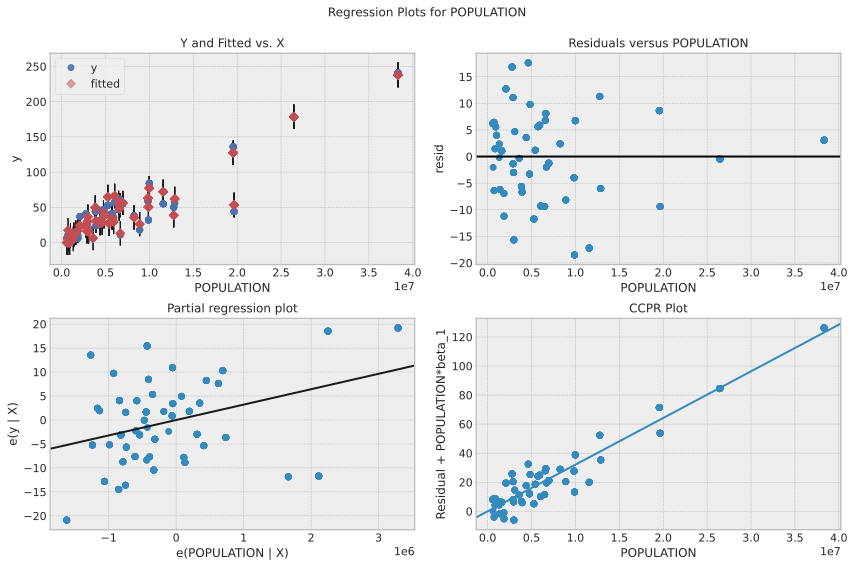

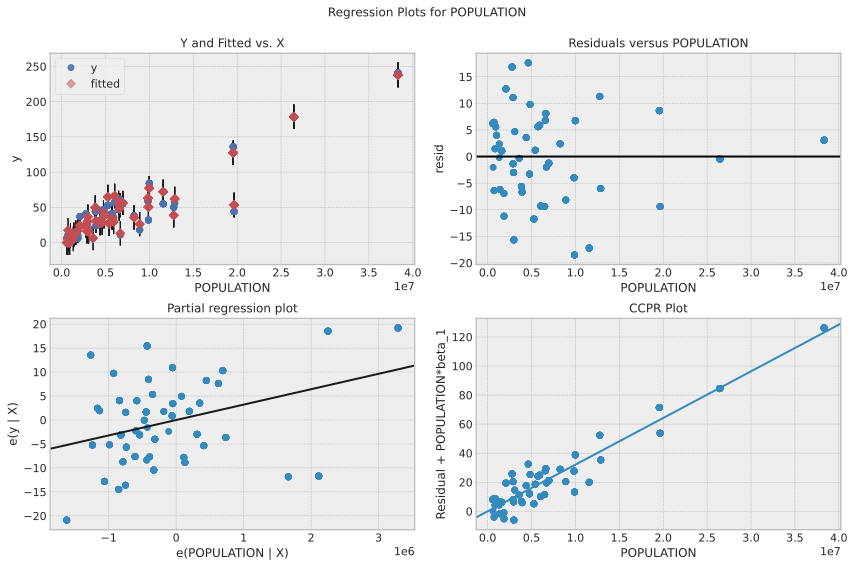

In [ ]:
#create residual vs. Deaths 2020 plot for 'Population'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lm_fit, 'POPULATION', fig=fig)
fig

###When analyzing residual plot, you should see a random pattern of points. If you notice a trend in these plots, you could have an issue with your coefficients. In our plot above, there is no trend of the residuals

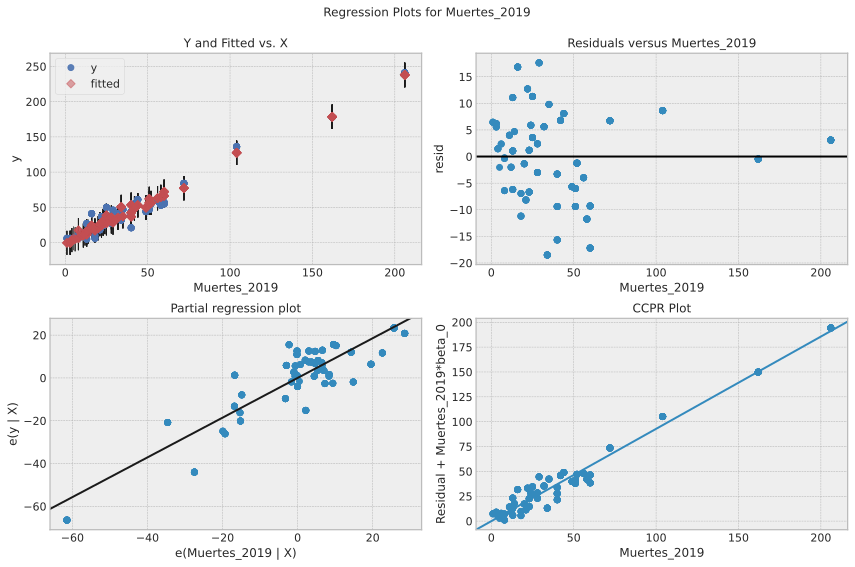

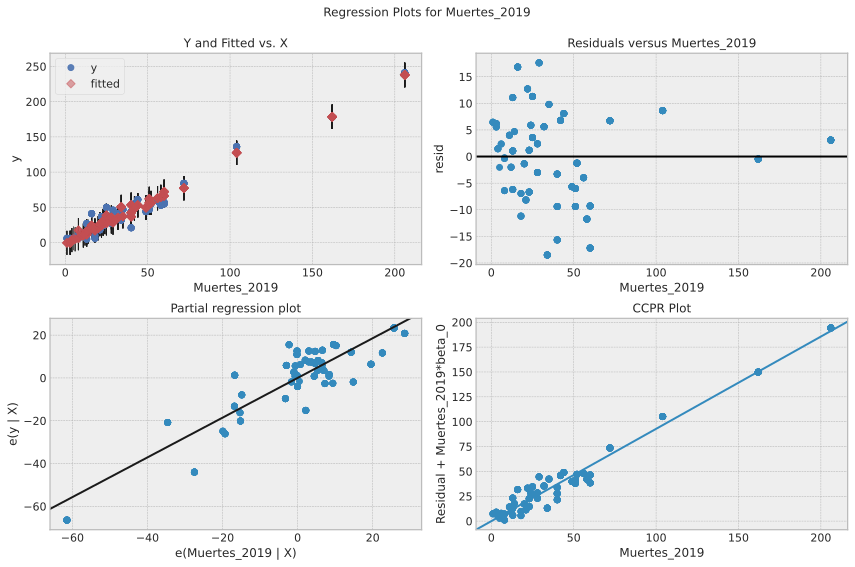

In [ ]:
#create residual vs. Deaths 2020 plot for 'Deaths 2019'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lm_fit, 'Muertes_2019', fig=fig)
fig


In both plots the residuals appear to be randomly scattered around zero, which is an indication that heteroscedasticity is not a problem with either predictor variable in the model.

**EDA**----------
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/ggandara13/innocent_death/6a4499d9a07ba6901017dc52ca70c805315fac9b/Innocent%20Deaths%20caused%20by%20Police.csv")

In [ ]:
import plotly.io as pio

# naming a layout theme for future reference
pio.templates["google"] = go.layout.Template(
    layout_colorway=['#4285F4', '#DB4437', '#F4B400', '#0F9D58',
                     '#185ABC', '#B31412', '#EA8600', '#137333',
                     '#d2e3fc', '#ceead6']
)

# setting Google color palette as default
pio.templates.default = "google"

Age has invalid values, so we will replace and coerce the values to NaN in case it is invalid

In [ ]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
a = data['Age'].unique()
a.size

110

Mean Age by Gender and classified by mental illness

In [ ]:
data.groupby(['Gender',"Foreknowledge of mental illness"])["Age"].mean()

Gender       Foreknowledge of mental illness
Female       Drug or alcohol use                34.190083
             No                                 34.509725
             Unknown                            36.917031
             Yes                                42.579167
Male         Drug or alcohol use                36.215263
             No                                 34.344765
             Unknown                            35.686644
             Yes                                39.559587
Transgender  Drug or alcohol use                41.500000
             No                                 30.916667
             Unknown                            25.000000
             Yes                                32.000000
Name: Age, dtype: float64

In [ ]:
import plotly.express as px

long_df = data

fig = px.bar(long_df, x="Gender", y="Age", color="Race", color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
)
fig.show()

In [ ]:
data['Location_Code'] = data['Location of death (city)'].astype('str') 

In [ ]:
xx = data['Location of death (city)'].astype('str') 
xx.describe()


count       30860
unique       6257
top       Houston
freq          482
Name: Location of death (city), dtype: object

Nulls by Variable. In the model we applied the cleaning Nulls with deleting the row with nulls

In [ ]:
data.isna().sum()

Unique ID                                                     0
Name                                                          0
Age                                                        1174
Gender                                                      136
Race                                                          0
URL of image                                              16505
 Date of injury resulting in death (month/day/year)           0
Location of injury (address)                                554
Location of death (city)                                     38
State                                                         0
Location of death (zip code)                                185
Location of death (county)                                   15
Full Address                                                  0
Latitude                                                      0
Longitude                                                     0
Agency or agencies involved             

# Individual and Cumulative Binomial Distribution

In [ ]:
ss.binom.pmf(k=10, n=10, p=0.9) #Probability that if they kill 10 people they will all be men

0.34867844010000004

In [ ]:
1-ss.binom.cdf(k=3, n=10, p=0.1) #Probability that if 10 people are killed, 3 will be women 

0.012795198399999985

In [ ]:
1-ss.binom.cdf(k=1, n=10, p=0.1) #Probability that if 10 people are killed, 1 will be woman 

0.2639010708999998

In [ ]:
10385/22177 #  whites / total deaths which we know race of the victim

0.46827794561933533

In [ ]:
ss.binom.cdf(k=8, n=10, p=0.532)-ss.binom.cdf(k=5, n=10, p=0.532) #Probability that if 10 people are killed between 6 and 8 won't be white. 

0.43998270994212296

In [ ]:
ss.binom.cdf(k=8, n=10, p=0.468)-ss.binom.cdf(k=5, n=10, p=0.468) #Probability that if 10 people are killed between 6 and 8 will be white.

0.2948974306155905

##Are you more likely to be killed by police if you are not white? 


In [ ]:
53/35 #53% of murdered are not white while 35% of the population are not white

1.5142857142857142

In [ ]:
47/65 #47% of those killed are white while 65% of the population are white

0.7230769230769231

In [ ]:
1.51/0.72 # Times you are more likely to be killed if you are not white

2.0972222222222223

# Are you more likely to be killed by police if you are not white? (relation with number of crimes by race)



In [ ]:
47/51 # Whites represent 47% of deaths but 51% of crimes

0.9215686274509803

In [ ]:
53/49 # Non-whites represent 53% of deaths but 59% of crimes 

1.0816326530612246

In [ ]:
1.08/0.92 # Times more likely to be killed by the police if you are not white in relation with crimes commited 

1.173913043478261

# Are you more likely to be killed by police if you are black instead of white? (relation with number of crimes by race)


In [ ]:
6850/22177 # Blacks murdered / total murdered 

0.30887856788564727

In [ ]:
31/26.9 # Black people murdered / Crimes commited by black people 

1.1524163568773236

In [ ]:
1.1524/0.92

1.252608695652174

# Are you more likely to be killed by police if you are asian instead of white? (relation with number of crimes by race)

In [ ]:
2.16/1.12 # % of asian people murdered/ crimes commited by asian people 

1.9285714285714286

In [ ]:
1.93/0.92

2.0978260869565215